## Jupyter Notebook Introduction

Jupyter Notebooks allow us to run snippets of Python Code in the browser. There are two main types of cells: text cells and code cells.

This is a text cell which is also called a Markdown cell. We can change the type of cell by selecting the cell we want to switch. Then, we go up to the tool bar and select the desired cell type from the drop down menu. In a text cell, we can do some formatting like **bold**, *italics*, and create equations: $$2x_1 + 3x_2 = 10$$.

In [1]:
# This is a comment in a code cell

In [2]:
# Here we assign the variable string the value 'Hello World!'
string = 'Hello World!'
# If we have a variable or function that returns some object on the last row of a code cell, the 
# value of that variable or the returned object from the function will be printed to the cell output.
string

'Hello World!'

In [3]:
# Here we define a function that takes an input variable called name and returns a string
def func(name):
    return 'Hello ' + name + '!'

In [4]:
# This is a new cell but we can still access the function defined in the previous cell.
func('you')

'Hello you!'

## Import Python Packages

In [5]:
import numpy as np # Array processing for numbers, strings, records, and objects
import pandas as pd # High-performance, easy-to-use data structures and data analysis tools
from concorde.tsp import TSPSolver# Python wrapper for the Concorde TSP solver
import matplotlib.pyplot as plt # Publication quality figures in python

Note: Must have a Mac and have pyconcorde installed

## Reading and Manipulating Dataframes

In [6]:
data = pd.read_csv('data-demo/hygdata_v3.csv').set_index('id') # read a CSV file
data.head()

,hip,hd,hr,gl,bf,proper,ra,dec,dist,pmra,...,bayer,flam,con,comp,comp_primary,base,lum,var,var_min,var_max
id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,Sol,0.000000,0.000000,0.0000,0.00,...,NaN,NaN,NaN,1,0,NaN,1.000000,NaN,NaN,NaN
1,1.0,224700.0,NaN,NaN,NaN,NaN,0.000060,1.089009,219.7802,-5.20,...,NaN,NaN,Psc,1,1,NaN,9.638290,NaN,NaN,NaN
2,2.0,224690.0,NaN,NaN,NaN,NaN,0.000283,-19.498840,47.9616,181.21,...,NaN,NaN,Cet,1,2,NaN,0.392283,NaN,NaN,NaN
3,3.0,224699.0,NaN,NaN,NaN,NaN,0.000335,38.859279,442.4779,5.24,...,NaN,NaN,And,1,3,NaN,386.901132,NaN,NaN,NaN
4,4.0,224707.0,NaN,NaN,NaN,NaN,0.000569,-51.893546,134.2282,62.85,...,NaN,NaN,Phe,1,4,NaN,9.366989,NaN,NaN,NaN


In [7]:
# clean the dataframe to only include fields we are interested in
data = data[~data['proper'].isna()][['proper', 'dist', 'ra', 'dec', 'pmra', 'pmdec']].dropna()
data.head()

,proper,dist,ra,dec,pmra,pmdec
id,,,,,,
0,Sol,0.0000,0.000000,0.000000,0.00,0.00
676,Alpheratz,29.7442,0.139791,29.090432,135.68,-162.95
744,Caph,16.7842,0.152887,59.149780,523.39,-180.42
1065,Algenib,120.0480,0.220598,15.183596,4.70,-8.24
2076,Ankaa,25.9740,0.438056,-42.305981,232.76,-353.64


In [8]:
# unit conversions
data['dist'] = data['dist'].apply(lambda x: x*3.262) # convert from parsecs to lightyears
data['ra'] = data['ra'].apply(lambda x: x*15) # convert from hours to degrees 
data['pmra'] = data['pmra'].apply(lambda x: x*2.7777776630942*10**(-7)) # convert to degrees per year
data['pmdec'] = data['pmdec'].apply(lambda x: x*2.7777776630942*10**(-7)) # convert to degrees per year

# rename fields
data = data.rename(columns={'ra' : 'ra_2000', 'dec' : 'dec_2000'})

# calcualte 2020 right ascension and declination
data['ra_2020'] = data['ra_2000'] + 20*data['pmra']
data['dec_2020'] = data['dec_2000'] + 20*data['pmdec']

## Visualizations

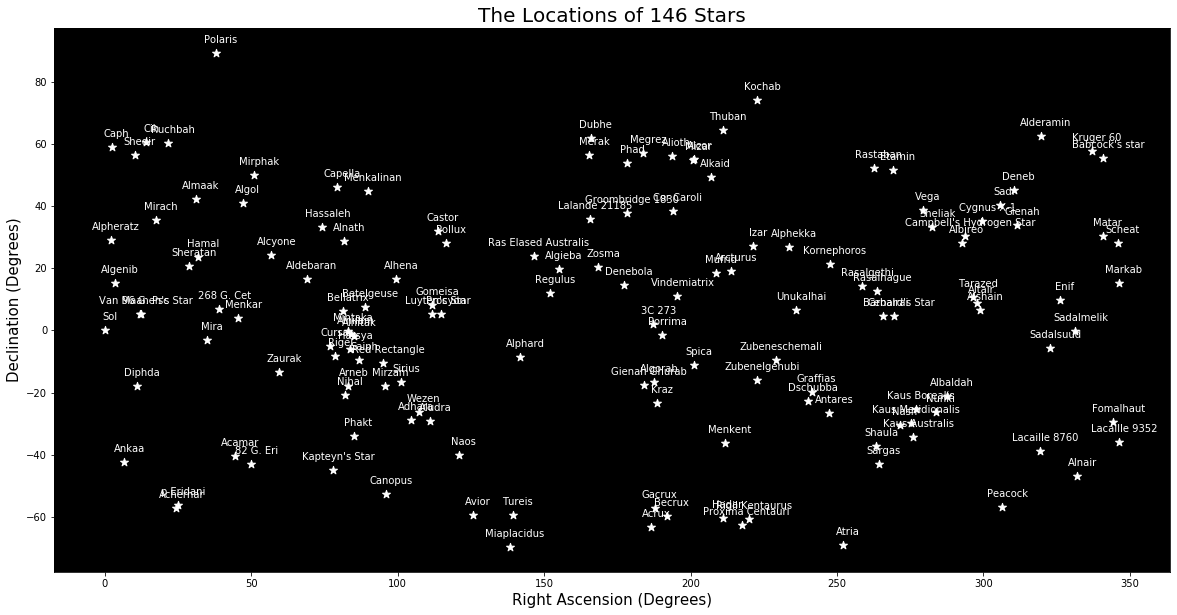

In [9]:
# generate a visualization of the star locations
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor('black')
plt.scatter(data.ra_2020,data.dec_2020, marker='*', color='white', s=70)
for index, row in data.iterrows():
    plt.annotate(row['proper'], 
                 (row['ra_2020'],row['dec_2020']),
                 textcoords="offset points", 
                 xytext=(5,10),
                 color= 'white',
                 ha='center')
plt.title('The Locations of 146 Stars', fontsize= 20)
plt.xlabel('Right Ascension (Degrees)', fontsize= 15)
plt.ylabel('Declination (Degrees)', fontsize= 15)
plt.show()

## Solving the TSP Instance

In [10]:
#list(data.ra_2020)
#list(data.dec_2020)

In [11]:
solver = TSPSolver.from_data(list(data.ra_2020), list(data.dec_2020), norm='GEO')
tour = solver.solve().tour

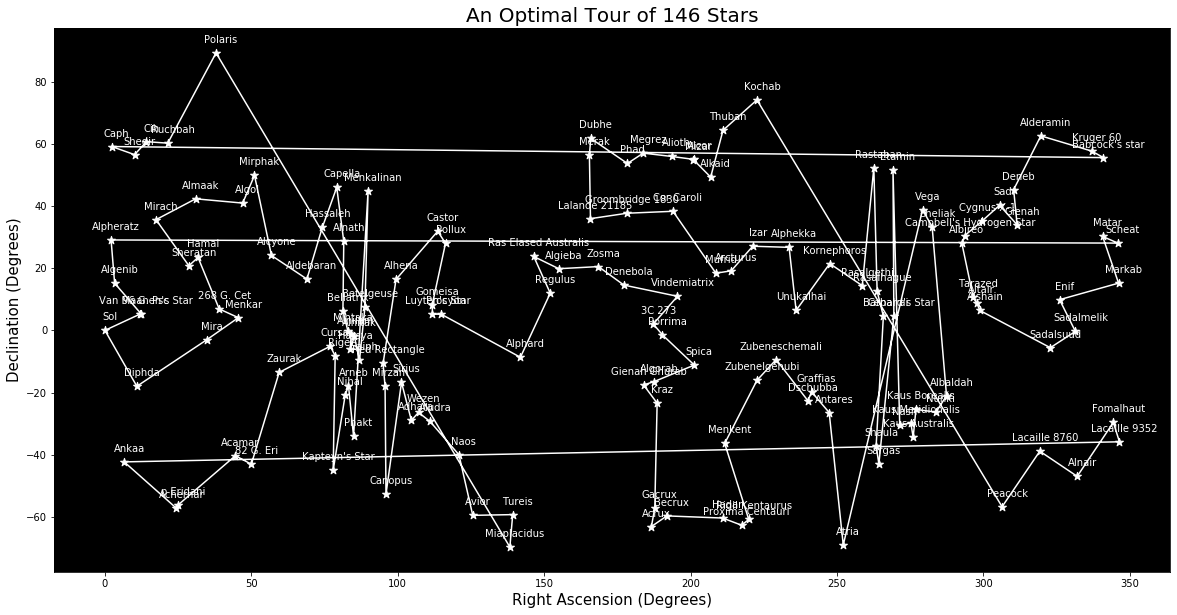

In [12]:
# Generate scatter plot of star locations
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor('black')
plt.scatter(data.ra_2020,data.dec_2020, marker='*', color='white', s=70)
for index, row in data.iterrows():
    plt.annotate(row['proper'], 
                 (row['ra_2020'],row['dec_2020']),
                 textcoords="offset points", 
                 xytext=(5,10),
                 color= 'white',
                 ha='center')
    
# Add path through these stars
tour_proper = [data.iloc[i].proper for i in tour]
tour_proper.append(tour_proper[0])
tour_ra = [data[data.proper == proper].ra_2020.to_list()[0] for proper in tour_proper]
tour_dec = [data[data.proper == proper].dec_2020.to_list()[0] for proper in tour_proper]
plt.plot(tour_ra, tour_dec, color='white')

# Set axes titles and display
plt.title('An Optimal Tour of 146 Stars', fontsize= 20)
plt.xlabel('Right Ascension (Degrees)', fontsize= 15)
plt.ylabel('Declination (Degrees)', fontsize= 15)
plt.show()